In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.8.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

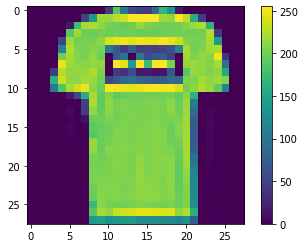

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

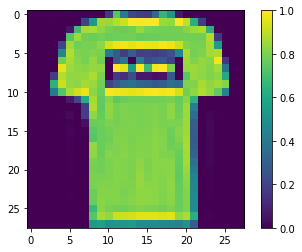

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [20]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4977 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8828
0.8827999830245972


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([[1.5211165e-06, 4.8490967e-09, 1.5753255e-09, ..., 2.0178175e-02,
        2.9321236e-06, 9.7965115e-01],
       [5.1242805e-05, 4.2679852e-13, 9.9932456e-01, ..., 5.4689606e-15,
        1.8897108e-09, 5.7435143e-11],
       [8.3790583e-09, 1.0000000e+00, 1.0821997e-13, ..., 6.0455658e-28,
        7.5895271e-12, 1.9255529e-21],
       ...,
       [3.5003439e-05, 1.7134698e-10, 6.5891218e-05, ..., 1.9788244e-09,
        9.9986541e-01, 4.5252860e-11],
       [3.0462881e-09, 9.9999869e-01, 4.2445894e-11, ..., 4.3534817e-16,
        2.0811784e-10, 3.9566393e-12],
       [2.8546043e-05, 8.7022780e-09, 3.8328312e-06, ..., 1.1378334e-02,
        4.3886525e-05, 1.2956820e-05]], dtype=float32)

In [28]:
y_pred[0]

array([1.5211165e-06, 4.8490967e-09, 1.5753255e-09, 6.3889520e-09,
       1.0603057e-09, 1.6549793e-04, 6.7691428e-07, 2.0178175e-02,
       2.9321236e-06, 9.7965115e-01], dtype=float32)

In [29]:
class_names

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [30]:
np.argmax(y_pred[0])

9

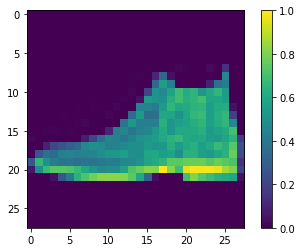

In [31]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history=model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2689 - accuracy: 0.9000 - val_loss: 0.3627 - val_accuracy: 0.8810
Epoch 2/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.2615 - accuracy: 0.9018 - val_loss: 0.3578 - val_accuracy: 0.8768
Epoch 3/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.2501 - accuracy: 0.9062 - val_loss: 0.3889 - val_accuracy: 0.8681
Epoch 4/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2435 - accuracy: 0.9098 - val_loss: 0.3560 - val_accuracy: 0.8827
Epoch 5/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2331 - accuracy: 0.9118 - val_loss: 0.3599 - val_accuracy: 0.8793
Epoch 6/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2269 - accuracy: 0.9143 - val_loss: 0.3652 - val_accuracy: 0.8792
Epoch 7/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2233 - accuracy: 0.9168 - val_loss: 0.3616 - val_ac

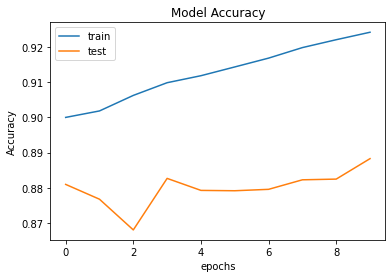

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

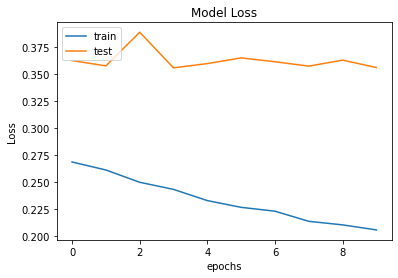

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Applying Regularizers**

In [36]:
from keras import regularizers
reg = Sequential()
reg.add(Flatten(input_shape = (28, 28)))
reg.add(Dense(128, activation = 'relu'))
reg.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l1(0.01),activity_regularizer=regularizers.l2(0.01)))
reg.add(Dense(10, activation = 'softmax'))

In [37]:
reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history_new=reg.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.6656 - accuracy: 0.8273 - val_loss: 0.5455 - val_accuracy: 0.8271
Epoch 2/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.4559 - accuracy: 0.8630 - val_loss: 0.4713 - val_accuracy: 0.8543
Epoch 3/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.4131 - accuracy: 0.8724 - val_loss: 0.4297 - val_accuracy: 0.8652
Epoch 4/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3869 - accuracy: 0.8808 - val_loss: 0.4253 - val_accuracy: 0.8636
Epoch 5/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3679 - accuracy: 0.8866 - val_loss: 0.4141 - val_accuracy: 0.8725
Epoch 6/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3539 - accuracy: 0.8908 - val_loss: 0.4070 - val_accuracy: 0.8703
Epoch 7/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3426 - accuracy: 0.8922 - val_loss: 0.4196 - val_ac

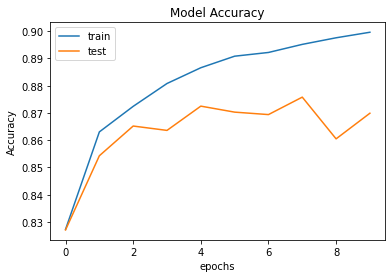

In [39]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

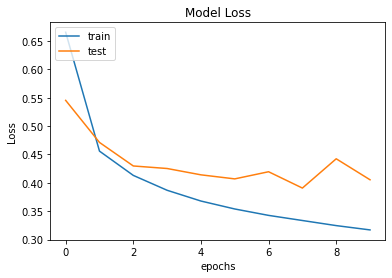

In [40]:
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()